In [ ]:
#🔧 Implementasi dengan NumPy
XT = X.T
B = np.linalg.inv(XT @ X) @ XT @ y
y_new_pred = x_pred @ B


| No | Luas Tanah (m²) | Jumlah Kamar | Umur Rumah (th) | Harga (Jt) |
|----|-----------------|--------------|------------------|-------------|
| 1  | 50              | 2            | 10               | 300         |
| 2  | 80              | 3            | 5                | 420         |
| 3  | 120             | 3            | 20               | 650         |
| 4  | 150             | 4            | 15               | 800         |
| 5  | 200             | 5            | 30               | 1100        |
| 6  | 90              | 2            | 8                | 480         |
| 7  | 170             | 4            | 12               | 980         |
| 8  | 130             | 3            | 7                | 720         |

---
| No | Luas Tanah (m²) | Jumlah Kamar | Umur Rumah (th) | Harga (Jt) Prediksi |
|----|-----------------|--------------|------------------|----------------------|
| 1  | 100             | 3            | 10               | ??                   |
| 2  | ...             | ...          | ...              | ...                  |



In [1]:
#1.	Import Library
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#2.	Data Latih >> fitur x dan target y
# ---------- Contoh data ----------
# Fitur: [luas (m2), jumlah_kamar, umur_rumah (tahun)]
X_features = np.array([
    [50, 2, 10],
    [80, 3, 5],
    [120, 3, 20],
    [150, 4, 15],
    [200, 5, 30],
    [90, 2, 8],
    [170, 4, 12],
    [130, 3, 7]
], dtype=float)

print ("X_features : \n" ,X_features)
# Target: harga rumah (juta rupiah)
y = np.array([300, 420, 650, 800, 1100, 480, 980, 720], dtype=float)
print ("y : \n" , y)

X_features : 
 [[ 50.   2.  10.]
 [ 80.   3.   5.]
 [120.   3.  20.]
 [150.   4.  15.]
 [200.   5.  30.]
 [ 90.   2.   8.]
 [170.   4.  12.]
 [130.   3.   7.]]
y : 
 [ 300.  420.  650.  800. 1100.  480.  980.  720.]


In [9]:

#3.	Normalisasi data Min-Max (0-1)
# ---------- Fungsi Normalisasi Min-Max ----------
def min_max_normalize(data):
    """Normalisasi data menggunakan metode Min-Max [0,1]"""
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data, min_vals, max_vals

def min_max_denormalize(normalized_data, min_vals, max_vals):
    """Denormalisasi data dari range [0,1] ke nilai asli"""
    return normalized_data * (max_vals - min_vals) + min_vals

# ---------- Normalisasi Fitur ----------
print("=== NORMALISASI DATA ===")
X_normalized, X_min, X_max = min_max_normalize(X_features)
print("Data fitur asli:")
print(X_features)
print("\nData fitur ternormalisasi:")
print(X_normalized)
print(f"\nMin values: {X_min}")
print(f"Max values: {X_max}")

# ---------- Normalisasi Target ----------
y_normalized, y_min, y_max = min_max_normalize(y.reshape(-1, 1))
y_normalized = y_normalized.flatten()
print(f"\nTarget asli: {y}")
print(f"Target ternormalisasi: {y_normalized}")
print(f"Min target: {y_min[0]}, Max target: {y_max[0]}")


=== NORMALISASI DATA ===
Data fitur asli:
[[ 50.   2.  10.]
 [ 80.   3.   5.]
 [120.   3.  20.]
 [150.   4.  15.]
 [200.   5.  30.]
 [ 90.   2.   8.]
 [170.   4.  12.]
 [130.   3.   7.]]

Data fitur ternormalisasi:
[[0.         0.         0.2       ]
 [0.2        0.33333333 0.        ]
 [0.46666667 0.33333333 0.6       ]
 [0.66666667 0.66666667 0.4       ]
 [1.         1.         1.        ]
 [0.26666667 0.         0.12      ]
 [0.8        0.66666667 0.28      ]
 [0.53333333 0.33333333 0.08      ]]

Min values: [50.  2.  5.]
Max values: [200.   5.  30.]

Target asli: [ 300.  420.  650.  800. 1100.  480.  980.  720.]
Target ternormalisasi: [0.     0.15   0.4375 0.625  1.     0.225  0.85   0.525 ]
Min target: 300.0, Max target: 1100.0


In [10]:
# ---------- Tambah kolom intercept (bias) ----------
n = X_normalized.shape[0]
intercept = np.ones((n, 1))
X = np.hstack([intercept, X_normalized])  # kolom pertama = 1 (b0)
print("Data fitur Persiapan data X:")
print(np.round(X, 3))
print(f"Target ternormalisasi y : {y_normalized}")


Data fitur Persiapan data X:
[[1.    0.    0.    0.2  ]
 [1.    0.2   0.333 0.   ]
 [1.    0.467 0.333 0.6  ]
 [1.    0.667 0.667 0.4  ]
 [1.    1.    1.    1.   ]
 [1.    0.267 0.    0.12 ]
 [1.    0.8   0.667 0.28 ]
 [1.    0.533 0.333 0.08 ]]
Target ternormalisasi y : [0.     0.15   0.4375 0.625  1.     0.225  0.85   0.525 ]


In [12]:
# 5.	OLS Matrix
# ---------- Hitung OLS (normal equation) ----------
print("\n=== REGRESI LINEAR DENGAN DATA NORMALISASI ===")
# XTX = Xᵀ × X
XT = X.T
XTX = XT @ X
print("XTX:",np.round(XTX, 3))


=== REGRESI LINEAR DENGAN DATA NORMALISASI ===
XTX: [[8.    3.933 3.333 2.68 ]
 [3.933 2.698 2.378 1.845]
 [3.333 2.378 2.222 1.68 ]
 [2.68  1.845 1.68  1.659]]


In [13]:
#6.	Mencari nilai B
# B_normalized berisi [b0, b1, b2, b3] untuk data ternormalisasi 
# B = (XTX)⁻¹ × Xᵀ × y = [b0, b1, b2]
B_normalized = np.linalg.inv(XTX) @ XT @ y_normalized
print("B_normalized:",np.round(B_normalized, 3))

B_normalized: [-0.038  1.085 -0.033 -0.015]


In [14]:
#7.	Prediksi menggunakan data awal utk mendapatkan hasil evaluasi 
#y_pred = b0*1 + b1*x1 + b2*x2 + b3*x3 + ...

# ---------- Prediksi dengan data ternormalisasi ----------
# y_pred = X × B
y_pred_normalized = X @ B_normalized
print("y_pred_normalized:",np.round(y_pred_normalized, 3))

y_pred_normalized: [-0.041  0.168  0.448  0.657  0.999  0.249  0.804  0.528]


In [15]:
#8.	Denormalisasi Prediksi
# ---------- Denormalisasi prediksi ----------
y_pred = min_max_denormalize(y_pred_normalized, y_min, y_max).flatten()
print("y_pred:",np.round(y_pred, 3))

y_pred: [ 267.168  434.457  658.493  825.782 1098.983  499.507  942.928  722.682]


In [16]:
# 9.	Evaluasi
# ---------- Evaluasi dengan data asli ----------
mse = np.mean((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y_pred)**2)
r2 = 1 - ss_res / ss_tot

print(f"\n=== EVALUASI MODEL (DATA ASLI) ===")
print(f"MSE = {mse:.3f}")
print(f"R^2  = {r2:.3f}")



=== EVALUASI MODEL (DATA ASLI) ===
MSE = 473.356
R^2  = 0.993


1. MSE = 473.356
- •	Rata-rata kuadrat error adalah 473.356
- •	Untuk konteks harga rumah (dalam ribuan dollar), ini berarti rata-rata error kuadrat adalah $473,356
- •	RMSE (Root Mean Squared Error) = √473.356 ≈ $21.76 (error rata-rata)
2. R² = 0.993
- •	Nilai 0.993 sangat tinggi (mendekati 1.0)
- •	Artinya: 99.3% variasi dalam harga rumah dapat dijelaskan oleh model regresi
- •	Hanya 0.7% variasi yang tidak dijelaskan model
- Visualisasi Konsep:
- Data Aktual (y):    [100, 200, 300, 400, 500]
- Prediksi (y_pred):  [102, 198, 302, 398, 502]
- Error:              [ -2,   2,  -2,   2,  -2]
- Kualitas Model Berdasarkan R²:
- •	R² = 0.993 → Excellent (sangat baik)
- •	0.8 - 0.99 → Very Good
- •	0.6 - 0.8 → Good
- •	0.4 - 0.6 → Fair
- •	< 0.4 → Poor
- Contoh Perbandingan:
- Model Sempurna:
- •	MSE = 0, R² = 1.0
- Model Bagus:
- •	MSE = 473.356, R² = 0.993 ← HASIL ANDA
- Model Buruk:
- •	MSE = 10,000, R² = 0.4


In [17]:
# ---------- Contoh prediksi untuk data baru ----------
print("\n=== CONTOH PREDIKSI ===")
# Data baru yang akan diprediksi
x_new_features = np.array([100, 3, 10])  # [luas=100, kamar=3, umur=10]

# Normalisasi data baru menggunakan parameter yang sama
x_new_normalized = (x_new_features - X_min) / (X_max - X_min)

# Tambah intercept
x_new_with_intercept = np.hstack([1, x_new_normalized])

# Prediksi dengan model ternormalisasi
y_new_pred_normalized = x_new_with_intercept @ B_normalized

# Denormalisasi prediksi
y_new_pred = y_new_pred_normalized * (y_max - y_min) + y_min

print(f"Data baru: luas={x_new_features[0]}m2, kamar={x_new_features[1]}, umur={x_new_features[2]}th")
print(f"Data baru ternormalisasi: {np.round(x_new_normalized, 3)}")
print(f"x_new_with_intercept: {np.round(x_new_with_intercept, 3)}")
print(f"B_normalized: {np.round(B_normalized, 3)}")
print(f"Prediksi ternormalisasi: x_new_with_intercept @ B_normalized = {y_new_pred_normalized:.4f}")
print(f"Prediksi harga = {y_new_pred[0]:.2f} juta rupiah")



=== CONTOH PREDIKSI ===
Data baru: luas=100m2, kamar=3, umur=10th
Data baru ternormalisasi: [0.333 0.333 0.2  ]
x_new_with_intercept: [1.    0.333 0.333 0.2  ]
B_normalized: [-0.038  1.085 -0.033 -0.015]
Prediksi ternormalisasi: x_new_with_intercept @ B_normalized = 0.3096
Prediksi harga = 547.70 juta rupiah


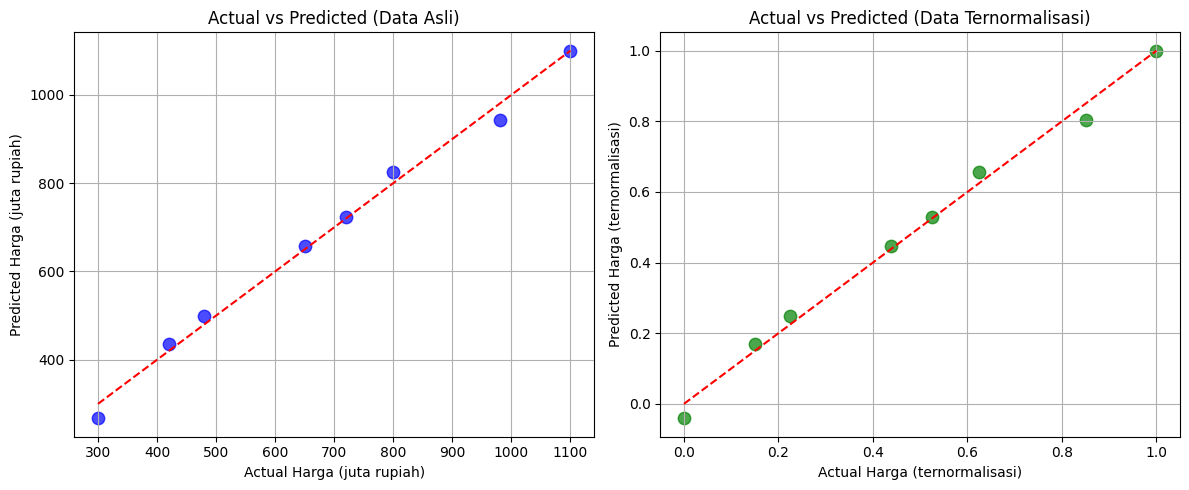


=== PERBANDINGAN DENGAN MODEL TANPA NORMALISASI ===
Koefisien model tanpa normalisasi:
 b0 (intercept) = 0.1992
 b1 = 5.7840
 b2 = -8.6742
 b3 = -0.4884
MSE tanpa normalisasi: 473.356
MSE dengan normalisasi: 473.356


In [19]:
#11.	Visualisasi

# ---------- Visualisasi: Actual vs Predicted ----------
plt.figure(figsize=(12, 5))

# Subplot 1: Data asli
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred, s=80, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red')
plt.xlabel("Actual Harga (juta rupiah)")
plt.ylabel("Predicted Harga (juta rupiah)")
plt.title("Actual vs Predicted (Data Asli)")
plt.grid(True)

# Subplot 2: Data ternormalisasi
plt.subplot(1, 2, 2)
plt.scatter(y_normalized, y_pred_normalized, s=80, color='green', alpha=0.7)
plt.plot([y_normalized.min(), y_normalized.max()], 
         [y_normalized.min(), y_normalized.max()], linestyle='--', color='red')
plt.xlabel("Actual Harga (ternormalisasi)")
plt.ylabel("Predicted Harga (ternormalisasi)")
plt.title("Actual vs Predicted (Data Ternormalisasi)")
plt.grid(True)

plt.tight_layout()
plt.show()

# ---------- Perbandingan dengan model tanpa normalisasi ----------
print("\n=== PERBANDINGAN DENGAN MODEL TANPA NORMALISASI ===")
# Model tanpa normalisasi (seperti script asli)
X_original = np.hstack([np.ones((n, 1)), X_features])
if np.linalg.cond(X_original.T @ X_original) < 1 / np.finfo(XTX.dtype).eps:
    B_original = np.linalg.inv(X_original.T @ X_original) @ X_original.T @ y
else:
    B_original = np.linalg.pinv(X_original) @ y

y_pred_original = X_original @ B_original
mse_original = np.mean((y - y_pred_original)**2)

print("Koefisien model tanpa normalisasi:")
for i, coef in enumerate(B_original):
    if i == 0:
        print(f" b0 (intercept) = {coef:.4f}")
    else:
        print(f" b{i} = {coef:.4f}")

print(f"MSE tanpa normalisasi: {mse_original:.3f}")
print(f"MSE dengan normalisasi: {mse:.3f}")
